Instrucciones
=============

1. Instalar ipython notebook
----------------------------

Ipython notebook es lo que usamos para crear y ejecutar estos "documentos con código" (notebooks). Lo instalamos usando pip:

    pip install "ipython[notebook]"
    
(con ``sudo`` antes, para los que están en linux y no están usando virtualenvs)


2. Instalar libs
----------------

Además vamos a estar usando varias libs útiles, que se instalan también con pip:

    pip install scikit-learn scipy pandas matplotlib seaborn
    

3. Abrir este notebook
----------------------

Bajen el archivo ``casas_regresion_lineal.ipynb`` del repo, luego abran una consola, ingresen al directorio donde se encuentra el archivo, y ejecuten:

    ipython notebook
  
Esto les va a abrir una ventana del navegador web, donde pueden ver la lista de archivos del directorio, y entre esos archivos van a ver el notebook que se bajaron. Háganle click para abrirlo.
  

4. Uso del notebook
-------------------

La interfaz es bastante sencilla. Algunas cosas básicas que les pueden resultar útiles:

 * Para modificar el texto de una celda, háganle ``click`` o ``doble click``.

 * Para ejecutar una celda sola de forma rápida, usen ``shift+enter`` (en las de código, ejecuta el código, en las de texto, lo renderiza)
 
 * Pueden ejecutar todas las veces que quieran las celdas, en el orden que prefieran, etc. (pero claramente, para arrancar ejecuten las celdas en orden)

Pueden experimentar con el resto de las cosas que ven en la interfaz :)

Código
======

Primero, imports de las cosas que usamos:

In [16]:
# la lib que usamos para leer y trabajar con datos
import pandas as pd

# la lib que usamos para graficar
import matplotlib.pyplot as plt
# y una lib que hace que esos graficos se vean mas lindos
import seaborn

# la lib que usamos para machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split

# le decimos al notebook que muestre los graficos solo
%matplotlib inline

# tamaño por default para los graficos
plt.rcParams['figure.figsize'] = (10, 5)

Los datos
=========

Ahora podemos leer los datos del archivo csv con información de las casas. Para eso, recuerden bajar también el archivo ``casas.csv`` y ubicarlo en el mismo directorio que el notebook. Pueden bajarlo ahora, si recién se dieron cuenta, no hace falta "reiniciar" nada, solo vuelvan a correr esta celda :)

In [17]:
datos = pd.read_csv('casas.csv')

print 'Hay datos de', len(datos), 'casas'

Hay datos de 100 casas


Mostramos un poco de los datos, para darnos una idea de cómo se ven (.head() muestra solo las 5 primeros filas):

In [18]:
datos.head()

,metros,habitaciones,edad,precio
0,219,10,64,451214
1,391,4,23,609465
2,267,7,26,472804
3,253,10,70,484586
4,282,7,5,573344


Parecen ajustarse a una recta si miramos precio respecto a cantidad de habitaciones? No:

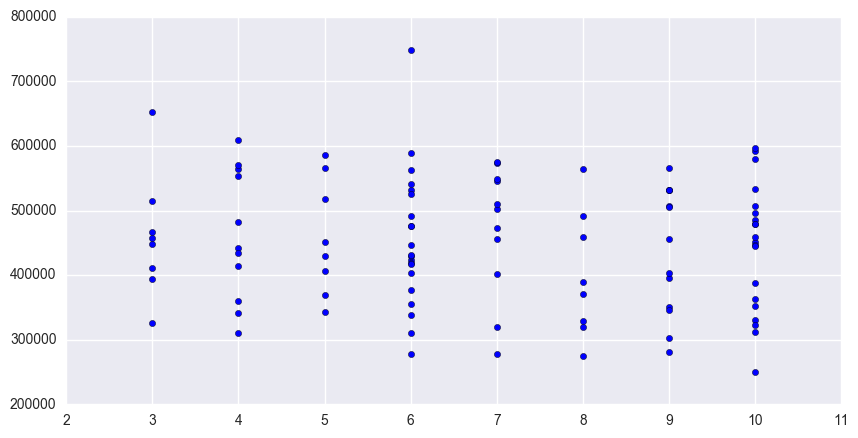

In [19]:
plt.scatter(x=datos.habitaciones, y=datos.precio)

Y si miramos precio respecto a metros cuadrados? Ahora sí:

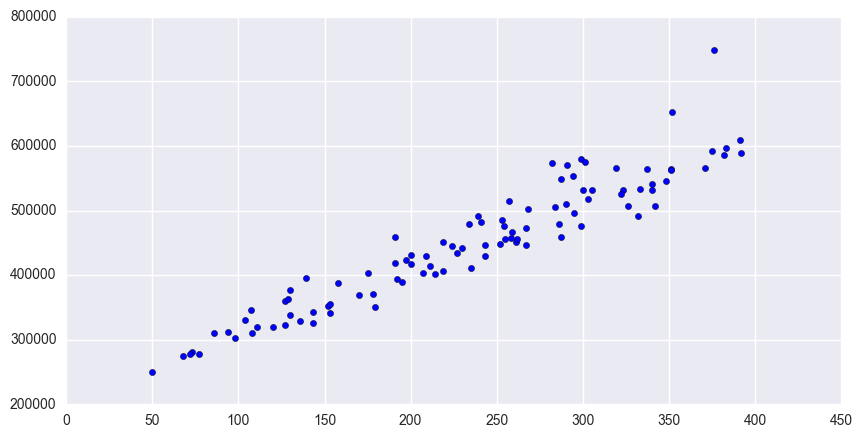

In [20]:
plt.scatter(x=datos.metros, y=datos.precio)

El predictor
============

Como vimos en clases, es buena práctica (y necesaria casi siempre) separar los datos en dos conjuntos, uno para entrenar y otro para testear. Hacemos eso:

In [21]:
entrenamiento, test = train_test_split(datos, test_size=0.1)

Ahora creamos un predictor que use regresión lineal, y lo entrenamos con nuestros datos de entrenamiento, para que aprenda la función (recta) que mejor se ajuste a los datos. Nuestras columnas de entrada van a ser los metros cuadrados, cantidad de habitaciones y años de antigüedad de las casas, mientras que nuestras salidas (lo que queremos predecir) van a ser los precios.

In [22]:
columnas_entrada = ['metros', 'habitaciones', 'edad']

modelo = LinearRegression()

modelo.fit(X=entrenamiento[columnas_entrada],
           y=entrenamiento.precio)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Y ahora con nuestro modelo entrenado, podemos intentar predicciones sobre distintas casas.

Sobre las que usamos para entrenar:

In [23]:
modelo.predict(entrenamiento[columnas_entrada])

array([ 487858.98706104,  454339.60358681,  483179.79994877,
        616045.43792024,  334919.39533301,  574892.59811422,
        598756.24045807,  447850.65780855,  606774.70907291,
        587063.82900621,  519588.72851352,  538739.22123208,
        482876.88288533,  547520.16134269,  459507.28479842,
        450033.62016703,  284044.79563022,  428953.35516954,
        550190.77850655,  258790.0574341 ,  391157.38328595,
        618550.81002166,  506885.43831815,  506844.54669952,
        337086.28123824,  375308.69667758,  345457.39390041,
        502484.26879328,  451866.06006705,  344990.07106849,
        304870.79124002,  566359.21361491,  577777.87534205,
        484629.90115114,  558221.49871291,  290016.37961031,
        484944.85447685,  426319.14643238,  545000.63139013,
        453421.77701706,  560826.8520937 ,  520862.38768514,
        539736.46943604,  350720.48888883,  411094.19235312,
        553998.13782435,  414593.83943319,  391045.3657443 ,
        409584.16219603,

Sobre las que reservamos para test:

In [24]:
modelo.predict(test[columnas_entrada])

array([ 463509.8115007 ,  485791.01546952,  414298.15111527,
        323449.41234471,  358418.66934961,  516674.05627526,
        436774.52246857,  430721.38292293,  366282.86219861,
        456558.12273556])

O incluso otras casas nuevas que veamos por ahí:

In [26]:
nuevas_casas = pd.DataFrame(
    [   # metros, habitaciones, edad
        [250, 10, 20],
        [50, 2, 1],
        [500, 20, 10],
    ],
    columns=columnas_entrada
)

modelo.predict(nuevas_casas[columnas_entrada])

array([ 463489.47952724,  273103.89872   ,  703537.75176933])

Evaluación
==========

Qué tan bien predice? Podemos medir el error en los distintos conjuntos de datos:

In [29]:
print "Error promedio en datos de entrenamiento:"
print mean_absolute_error(entrenamiento.precio,
                          modelo.predict(entrenamiento[columnas_entrada]))

print "Error promedio en datos de test:"
print mean_absolute_error(test.precio,
                          modelo.predict(test[columnas_entrada]))

Error promedio en datos de entrenamiento:
23237.8392116
Error promedio en datos de test:
23880.6968598


Incluso podemos graficar las casas que usamos, comparando sus precios reales (azules) con los precios que predice nuestro predictor (verdes):

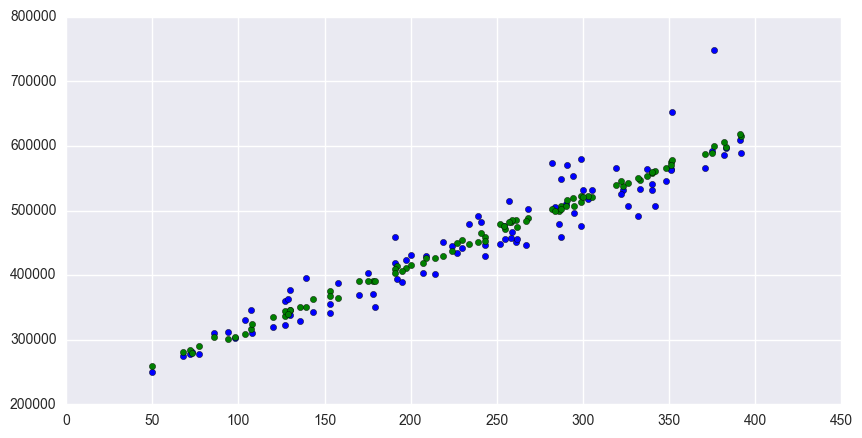

In [30]:
plt.scatter(x=entrenamiento.metros, y=entrenamiento.precio, c='b')
plt.scatter(x=entrenamiento.metros, y=modelo.predict(entrenamiento[columnas_entrada]), c='g')

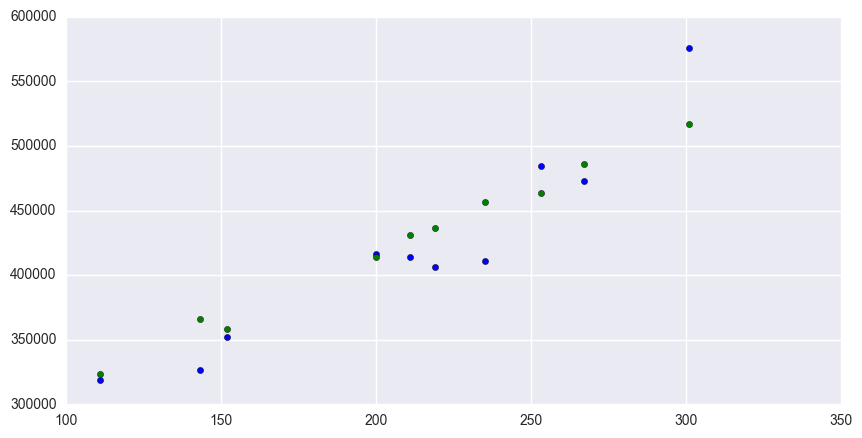

In [31]:
plt.scatter(x=test.metros, y=test.precio, c='b')
plt.scatter(x=test.metros, y=modelo.predict(test[columnas_entrada]), c='g')